Os dados utilizados neste estudo foram extraídos do DATASUS em 09 de março de 2025, a partir do sistema SINAN (Sistema de Informação de Agravos de Notificação). O conjunto contempla registros de acidentes com animais peçonhentos ocorridos no estado de São Paulo no período de 2007 a 2023.

# **Inicializando os dados**

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [35]:
# Lê os dados diretamente do CSV
caminho_csv = 'ANIMBR_SP.csv'  # Altere se necessário
df = pd.read_csv(caminho_csv)
df.head()

<ipython-input-35-c11248f7b5b9>:3: DtypeWarning: Columns (21,75) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminho_csv)


,TP_NOT,ID_AGRAVO,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,DT_SIN_PRI,SEM_PRI,...,COM_SISTEM,COM_RENAL,COM_EDEMA,COM_SEPTIC,COM_CHOQUE,DOENCA_TRA,EVOLUCAO,DT_OBITO,DT_ENCERRA,DT_DIGITA
0,2,X29,2007-01-25,200704,2007,35,350280,1336.0,2007-01-25,200704,...,2.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,2007-01-25,2007-01-26
1,2,X29,2007-01-29,200705,2007,35,354850,1349.0,2007-01-29,200705,...,9.0,NaN,NaN,NaN,NaN,9.0,NaN,NaN,2007-02-15,2007-02-15
2,2,X29,2007-01-22,200704,2007,35,351660,1344.0,2007-01-13,200702,...,2.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,2007-01-22,2007-01-29
3,2,X29,2007-01-25,200704,2007,35,351660,1344.0,2007-01-10,200702,...,2.0,NaN,NaN,NaN,NaN,2.0,1.0,NaN,2007-01-25,2007-01-29
4,2,X29,2007-01-03,200701,2007,35,351660,1344.0,2006-12-28,200652,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2007-01-03,2007-01-15


In [36]:
df.columns

Index(['TP_NOT', 'ID_AGRAVO', 'DT_NOTIFIC', 'SEM_NOT', 'NU_ANO', 'SG_UF_NOT',
       'ID_MUNICIP', 'ID_REGIONA', 'DT_SIN_PRI', 'SEM_PRI', 'ANO_NASC',
       'NU_IDADE_N', 'CS_SEXO', 'CS_GESTANT', 'CS_RACA', 'CS_ESCOL_N', 'SG_UF',
       'ID_MN_RESI', 'ID_RG_RESI', 'ID_PAIS', 'DT_INVEST', 'ID_OCUPA_N',
       'ANT_DT_ACI', 'ANT_UF', 'ANT_MUNIC_', 'ANT_LOCALI', 'ANT_TEMPO_',
       'ANT_LOCA_1', 'MCLI_LOCAL', 'CLI_DOR', 'CLI_EDEMA', 'CLI_EQUIMO',
       'CLI_NECROS', 'CLI_LOCAL_', 'CLI_LOCA_1', 'MCLI_SIST', 'CLI_NEURO',
       'CLI_HEMORR', 'CLI_VAGAIS', 'CLI_MIOLIT', 'CLI_RENAL', 'CLI_OUTR_2',
       'CLI_OUTR_3', 'CLI_TEMPO_', 'TP_ACIDENT', 'ANI_TIPO_1', 'ANI_SERPEN',
       'ANI_ARANHA', 'ANI_LAGART', 'TRA_CLASSI', 'CON_SOROTE', 'NU_AMPOLAS',
       'NU_AMPOL_1', 'NU_AMPOL_8', 'NU_AMPOL_6', 'NU_AMPOL_4', 'NU_AMPO_7',
       'NU_AMPO_5', 'NU_AMPOL_9', 'NU_AMPOL_3', 'COM_LOC', 'COM_SECUND',
       'COM_NECROS', 'COM_COMPOR', 'COM_DEFICT', 'COM_APUTAC', 'COM_SISTEM',
       'COM_RENAL', 

In [37]:
df.shape

(539695, 76)

#**Filtrando as colunas**
Removendo colunas desnecessárias ou que com muitos valores em branco.

## Colunas de localização

### Local da notificação

In [38]:
# Conferindo se os dados são do estado de SP (UF = 35)
df['SG_UF_NOT'].unique()

array([35])

Dessa forma, todos os casos considerados no conjunto de dados em estudo referem-se a notificações ocorridas exclusivamente no estado de São Paulo (UF = 35).

In [39]:
pd.crosstab(index=df['ID_REGIONA'], columns='Frequência', dropna=False, normalize = True)

col_0,Frequência
ID_REGIONA,
1331.0,0.014540
1332.0,0.002661
1333.0,0.007154
1334.0,0.007684
1335.0,0.006593
1336.0,0.027684
1337.0,0.013908
1338.0,0.003528
1339.0,0.017154


Apesar de a variável `ID_REGIONA` conter informações potencialmente relevantes sobre a regional de saúde da notificação, ela apresenta uma quantidade significativa de valores ausentes. Por esse motivo, será excluída nesta etapa da análise. Caso se mostre necessário futuramente, a variável poderá ser reincorporada com os dados atualizados de regionalidade.


In [40]:
df.drop(columns=['ID_REGIONA'], inplace=True);

### Local do acidente

In [41]:
# Verificando em qual estado ocorreu o acidente
freq_uf_aci = pd.crosstab(index=df['ANT_UF'], columns='Frequência')
freq_uf_aci

col_0,Frequência
ANT_UF,
11.0,1
12.0,1
13.0,3
15.0,6
16.0,5
21.0,2
22.0,9
23.0,9
24.0,3


In [42]:
# Analisando o estado do acidente de forma relativa
relativa_uf_aci = pd.crosstab(index=df['ANT_UF'], columns='Frequência Relativa', normalize=True)
relativa_uf_aci

col_0,Frequência Relativa
ANT_UF,
11.0,0.000002
12.0,0.000002
13.0,0.000006
15.0,0.000011
16.0,0.000009
21.0,0.000004
22.0,0.000017
23.0,0.000017
24.0,0.000006


Aproximadamente 99,8% dos acidentes registrados ocorreram no estado de São Paulo, o que evidencia uma concentração expressiva dos dados. Considerando que os registros provenientes de outros estados representam uma parcela irrelevante da amostra e podem introduzir distorções nas análises sobretudo naquelas que envolvem o estudo das distâncias, optou-se por sua exclusão. A seguir, são apresentadas visualizações que reforçam essa desproporcionalidade.

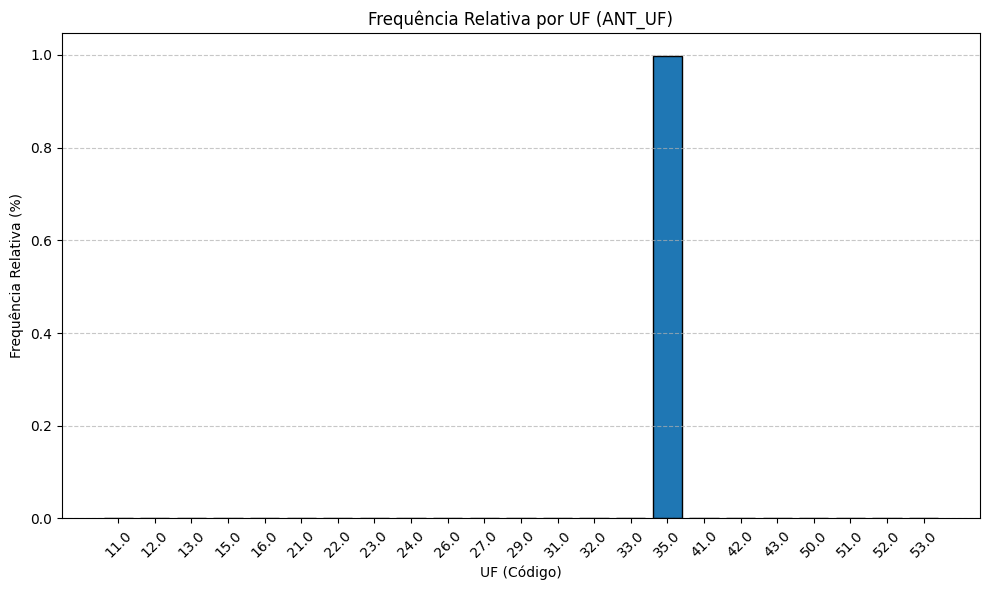

In [43]:
# Resetando o índice para plotar com rótulos
relativa_uf_aci = relativa_uf_aci.reset_index()

# Plotando
plt.figure(figsize=(10, 6))
plt.bar(relativa_uf_aci['ANT_UF'].astype(str), relativa_uf_aci['Frequência Relativa'], edgecolor='black')
plt.xlabel('UF (Código)')
plt.ylabel('Frequência Relativa (%)')
plt.title('Frequência Relativa por UF (ANT_UF)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

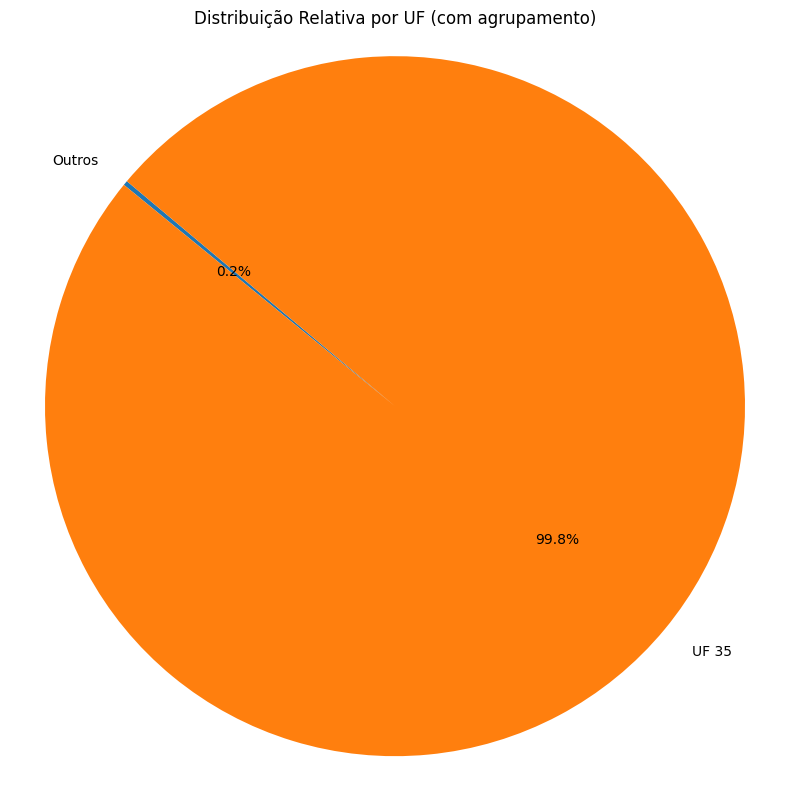

In [44]:
# Agrupa UFs com menos de 0.98% como "Outros"
relativa_uf_aci['Grupo'] = [
    f'UF {int(uf)}' if freq >= 0.98 else 'Outros'
    for uf, freq in zip(relativa_uf_aci['ANT_UF'], relativa_uf_aci['Frequência Relativa'])
]

# Agrupa os dados
relativa_agrupada = relativa_uf_aci.groupby('Grupo')['Frequência Relativa'].sum()

# Gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(relativa_agrupada, labels=relativa_agrupada.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição Relativa por UF (com agrupamento)')
plt.axis('equal')
plt.tight_layout()
plt.show()


In [45]:
df = df[df['ANT_UF'] == 35]
df['ANT_UF'].unique()

array([35.])

Portanto, todos os dados considerados neste estudo referem-se exclusivamente a acidentes que ocorreram e foram notificados no estado de São Paulo.

In [46]:
pd.crosstab(index=df['ANT_LOCALI'], columns='Frequência', dropna=False)

col_0,Frequência
ANT_LOCALI,
NaN,538116


A variável `ANT_LOCALI`, que representa a localidade onde ocorreu o acidente, encontra-se totalmente ausente no conjunto de dados. Diante disso, será desconsiderada na análise.

In [47]:
df.drop(columns=['ANT_LOCALI'], inplace=True);

### Local de Residência
As variáveis que indicam o local de residência do paciente não são relevantes para os objetivos deste estudo, pois a análise está focada na distância entre o local do acidente e o local de atendimento, independentemente do domicílio da vítima.

In [48]:
df.drop(columns=['ID_MN_RESI', 'SG_UF', 'ID_PAIS', 'ID_RG_RESI'], inplace=True);

## Colunas valores constante por padrão do SINAN

In [49]:
# Verificar se todos os valores na coluna 'TP_NOT' são '2'
df['TP_NOT'].unique()

array([2])

A variável `TP_NOT` indica o tipo de notificação no SINAN, sendo o valor 2 referente a notificações individuais. Como acidentes com animais peçonhentos são eventos isolados e não transmissíveis, todos os registros assumem esse valor.


In [50]:
# Verificar se todos os valores na coluna 'ID_AGRAVO' são 'X29'
df['ID_AGRAVO'].unique()

array(['X29'], dtype=object)

A variável `ID_AGRAVO` identifica o tipo de agravo notificado, sendo 'X29' o código utilizado para acidentes com animais peçonhentos. Como o banco de dados foi filtrado especificamente para esse tipo de ocorrência, todos os registros assumem esse valor.

In [51]:
df.drop(columns=['TP_NOT', 'ID_AGRAVO'], inplace=True);

## Colunas de datas

Para os objetivos desta análise, serão consideradas apenas as variáveis de data do acidente (`ANT_DT_ACI`) e de notificação (`DT_NOTIFIC`), que permitem estudar a relação temporal entre a ocorrência e o registro do evento. As demais datas, como `DT_INVEST`, `DT_OBITO`, `DT_ENCERRA` e `DT_DIGITA`, referem-se a etapas administrativas ou desfechos específicos, e foram desconsideradas por não contribuírem diretamente para a análise proposta.


In [52]:
# Conferindo se há alguma linha sem data do acidente
df[df['ANT_DT_ACI'].isna()]

,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,DT_SIN_PRI,SEM_PRI,ANO_NASC,NU_IDADE_N,CS_SEXO,...,COM_SISTEM,COM_RENAL,COM_EDEMA,COM_SEPTIC,COM_CHOQUE,DOENCA_TRA,EVOLUCAO,DT_OBITO,DT_ENCERRA,DT_DIGITA


In [53]:
# Conferindo se há alguma linha sem data da notificação
df[df['DT_NOTIFIC'].isna()]

,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,DT_SIN_PRI,SEM_PRI,ANO_NASC,NU_IDADE_N,CS_SEXO,...,COM_SISTEM,COM_RENAL,COM_EDEMA,COM_SEPTIC,COM_CHOQUE,DOENCA_TRA,EVOLUCAO,DT_OBITO,DT_ENCERRA,DT_DIGITA


In [54]:
df.drop(columns=['DT_INVEST', 'DT_OBITO', 'DT_ENCERRA', 'DT_DIGITA'], inplace=True);

## Colunas valores sobre sintomas

As colunas `SEM_PRI` e `DT_SIN_PRI`, que indicam respectivamente a semana e a data dos primeiros sintomas, foram descartadas por não serem relevantes para os objetivos da presente análise.

In [55]:
df.drop(columns=['SEM_PRI', 'DT_SIN_PRI'], inplace=True);

### Manifestações locais
As variáveis `'MCLI_LOCAL'`, `'CLI_DOR'`, `'CLI_EDEMA'`, `'CLI_EQUIMO'`, `'CLI_NECROS'`, `'CLI_LOCAL_'` e `'CLI_LOCA_1'` referem-se a manifestações clínicas locais do acidente. Como o foco do estudo é a análise espacial e logística da localização dos postos de soroterapia e fluxo de atendimento, essas informações não são relevantes. Além disso, são detalhamentos já sintetizados em variáveis como a classificação da gravidade.


In [56]:
pd.crosstab(index=df['MCLI_LOCAL'], columns='Frequência', dropna=False)

col_0,Frequência
MCLI_LOCAL,
1.0,506554
2.0,24319
9.0,5138
NaN,2105


In [57]:
df.drop(columns=['MCLI_LOCAL', 'CLI_DOR', 'CLI_EDEMA', 'CLI_EQUIMO', 'CLI_NECROS', 'CLI_LOCAL_', 'CLI_LOCA_1'], inplace=True);

### Manifestações sistêmicas
As variáveis `'MCLI_SIST'`, `'CLI_NEURO'`, `'CLI_HEMORR'`, `'CLI_VAGAIS'`, `'CLI_MIOLIT'`, `'CLI_RENAL'`, `'CLI_OUTR_2'`, `'CLI_OUTR_3'` e `'CLI_TEMPO_'` referem-se a manifestações sistêmicas e tempo de coagulação, de interesse clínico. Como o foco do estudo é geográfico e logístico, essas variáveis não são úteis, por isso, serão excluídas.



In [58]:
df.drop(columns=['MCLI_SIST', 'CLI_NEURO', 'CLI_HEMORR', 'CLI_VAGAIS', 'CLI_MIOLIT', 'CLI_RENAL', 'CLI_OUTR_2', 'CLI_OUTR_3', 'CLI_TEMPO_'], inplace=True);

### Complicações clínicas
As variáveis `'COM_LOC'`, `'COM_SECUND'`, `'COM_NECROS'`, `'COM_COMPOR'`, `'COM_DEFICT'`, `'COM_APUTAC'`, `'COM_SISTEM'`, `'COM_RENAL'`, `'COM_EDEMA'`, `'COM_SEPTIC'` e `'COM_CHOQUE'` descrevem complicações clínicas decorrentes do acidente, ou seja, não contribuem para os aspectos de interesse.


In [59]:
df.drop(columns=['COM_LOC', 'COM_SECUND', 'COM_NECROS', 'COM_COMPOR', 'COM_DEFICT', 'COM_APUTAC', 'COM_SISTEM', 'COM_RENAL', 'COM_EDEMA', 'COM_SEPTIC', 'COM_CHOQUE'], inplace=True);

## Colunas com valores inconsistentes

### Ocupação

A variável `ID_OCUPA_N`, que representa a ocupação exercida pelo paciente segundo a Classificação Brasileira de Ocupações (CBO), foi excluída da análise. Além de não estar diretamente relacionada aos objetivos do estudo, os valores presentes no campo apresentaram inconsistências e não permitiram uma categorização confiável para interpretação.


In [60]:
pd.crosstab(index=df['ID_OCUPA_N'], columns='Frequência', dropna=False)

col_0,Frequência
ID_OCUPA_N,
10210.0,5
10310.0,2
20110.0,1
20115.0,1
20310.0,2
...,...
999993,20704
999994,4731
999995,69


In [61]:
df.drop(columns=['ID_OCUPA_N'], inplace=True);

#**Dados finais**

In [62]:
df.columns

Index(['DT_NOTIFIC', 'SEM_NOT', 'NU_ANO', 'SG_UF_NOT', 'ID_MUNICIP',
       'ANO_NASC', 'NU_IDADE_N', 'CS_SEXO', 'CS_GESTANT', 'CS_RACA',
       'CS_ESCOL_N', 'ANT_DT_ACI', 'ANT_UF', 'ANT_MUNIC_', 'ANT_TEMPO_',
       'ANT_LOCA_1', 'TP_ACIDENT', 'ANI_TIPO_1', 'ANI_SERPEN', 'ANI_ARANHA',
       'ANI_LAGART', 'TRA_CLASSI', 'CON_SOROTE', 'NU_AMPOLAS', 'NU_AMPOL_1',
       'NU_AMPOL_8', 'NU_AMPOL_6', 'NU_AMPOL_4', 'NU_AMPO_7', 'NU_AMPO_5',
       'NU_AMPOL_9', 'NU_AMPOL_3', 'DOENCA_TRA', 'EVOLUCAO'],
      dtype='object')

In [63]:
df.shape

(538116, 34)

In [64]:
df.to_csv('dados.csv', index=False, encoding='utf-8')